MNIST Number recognition
---

1) We first import tensorflow 

2) Load in the MNIST dataset which comes with tensorflow 

3) Split the dataset into training and testing 

4) Feature scaling 

5) Define the model we will be using for our neural net 

6) We then define each of the layers in our neural network 

7) We then define the optimisation function (adam), our loss function (cross entropy) and the metric we wish to track.

8) We then train our model with 3 epochs (complete passes through the dataset) 

In [1]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

In [10]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2660 - accuracy: 0.9227
Epoch 2/3
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1091 - accuracy: 0.9660
Epoch 3/3
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0749 - accuracy: 0.9762


In [11]:
model.save("mnist_reader.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_reader.model/assets


In [2]:
new_model = tf.keras.models.load_model('mnist_reader.model')

In [3]:
predictions = new_model.predict(x_test)
print(predictions)

[[6.3295495e-08 1.5133864e-07 2.0594074e-05 ... 9.9997246e-01
  4.8193772e-07 9.0590851e-07]
 [1.3983473e-06 1.4970705e-03 9.9835747e-01 ... 9.9033426e-10
  3.6625030e-07 2.1949065e-10]
 [1.4509207e-07 9.9991143e-01 2.7105736e-05 ... 3.3059754e-05
  1.3585770e-05 9.9724286e-07]
 ...
 [5.0397349e-09 2.2319336e-06 5.5963869e-07 ... 6.5514374e-05
  1.9770227e-05 2.1833886e-05]
 [6.0235816e-05 8.8968989e-08 6.1139997e-07 ... 7.3746633e-06
  2.6086152e-03 8.9477147e-08]
 [2.3384287e-07 1.2646279e-07 1.4043879e-06 ... 8.3794782e-10
  6.2991063e-07 2.3509605e-10]]


Visual Testing
---

Below we made a for loop to run through the first 10 items in our test set, display our prediction for the value 

7


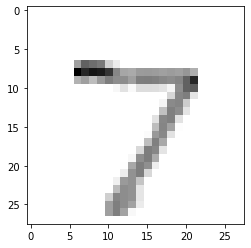

2


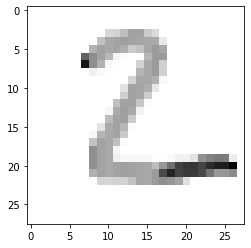

1


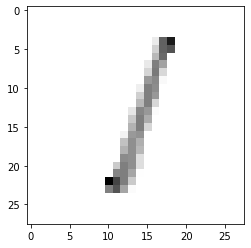

0


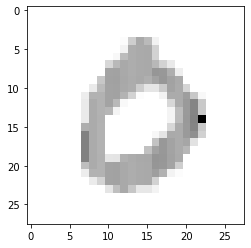

4


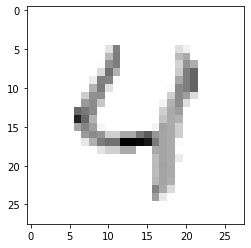

1


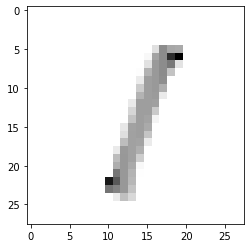

4


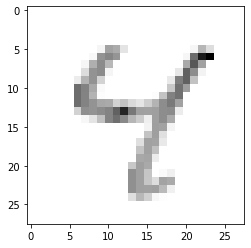

9


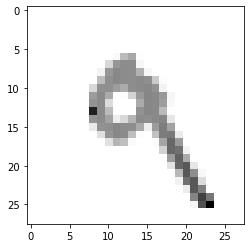

5


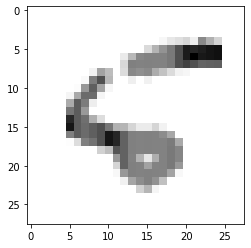

9


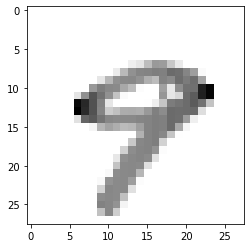

In [7]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
    print(np.argmax(predictions[i]))
    plt.imshow(x_test[i],cmap=plt.cm.binary)
    plt.show()